# --------------------- ML Model for Auto Insurance Industry ---------------------



### Aim of the Project
Build a Machine Learning Model to predict whether an owner will initiate an auto insurance claim in the next year.


### Use Cases
1. **Conquering Market Share**: Capture market share by lowering the prices of the premium for the customers, who are least likely to claim.
2. **Risk Management**: Charge the right premium from the customer, who is likely to claim insurance in the coming year
3. **Smooth Processing**: Reduce the complexity of pricing models. Most of the transactions are happening online with larger customer attributes (thanks to the internet and social media). Harness the power of huge data to build complex ML models.
4. **Increased Profits**: As per industry estimate 1% reduction in the claim can boost profit by 10%. So, through the ML model, we can identify and deny the insurance to the driver who will make a claim. Thus, ensuring reduced claim outgo and increased profit.



### Dataset Description
- 600k training data
- 57 features/data 
- In the train and test data
    - features that `belong to similar groupings` are tagged as such in the feature names (e.g., ind, reg, car, calc)
    - feature names include the 
        - postfix `bin` to indicate binary features 
        - postfix `cat` to indicate categorical features
        - without these designations are either `continuous or ordinal`
    - Values of `-1 indicate that the feature was missing` from the observation
    - the `target` column signifies whether a claim was filed for that policy holder.



# Loading Data

In [14]:
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score,precision_score, recall_score, f1_score


data = pd.read_csv("C:\\Users\\user\\Downloads\\train(1).csv")

data.head()

,id,target,ps_ind_01,ps_ind_02_cat,ps_ind_03,ps_ind_04_cat,ps_ind_05_cat,ps_ind_06_bin,ps_ind_07_bin,ps_ind_08_bin,...,ps_calc_11,ps_calc_12,ps_calc_13,ps_calc_14,ps_calc_15_bin,ps_calc_16_bin,ps_calc_17_bin,ps_calc_18_bin,ps_calc_19_bin,ps_calc_20_bin
0,7,0,2,2,5,1,0,0,1,0,...,9,1,5,8,0,1,1,0,0,1
1,9,0,1,1,7,0,0,0,0,1,...,3,1,1,9,0,1,1,0,1,0
2,13,0,5,4,9,1,0,0,0,1,...,4,2,7,7,0,1,1,0,1,0
3,16,0,0,1,2,0,0,1,0,0,...,2,2,4,9,0,0,0,0,0,0
4,17,0,0,2,0,1,0,1,0,0,...,3,1,1,3,0,0,0,1,1,0


### Load and Analyze the Dataset

Here is an excerpt of the the data description for the project:

- 600k training data
- 57 features/data 
- In the train and test data
    - features that `belong to similar groupings` are tagged as such in the feature names (e.g., ind, reg, car, calc)
    - feature names include the 
        - postfix `bin` to indicate binary features 
        - postfix `cat` to indicate categorical features
        - without these designations are either `continuous or ordinal`
    - Values of `-1 indicate that the feature was missing` from the observation
    - the `target` column signifies whether a claim was filed for that policy holder.

In [4]:
data.head()

,id,target,ps_ind_01,ps_ind_02_cat,ps_ind_03,ps_ind_04_cat,ps_ind_05_cat,ps_ind_06_bin,ps_ind_07_bin,ps_ind_08_bin,...,ps_calc_11,ps_calc_12,ps_calc_13,ps_calc_14,ps_calc_15_bin,ps_calc_16_bin,ps_calc_17_bin,ps_calc_18_bin,ps_calc_19_bin,ps_calc_20_bin
0,7,0,2,2,5,1,0,0,1,0,...,9,1,5,8,0,1,1,0,0,1
1,9,0,1,1,7,0,0,0,0,1,...,3,1,1,9,0,1,1,0,1,0
2,13,0,5,4,9,1,0,0,0,1,...,4,2,7,7,0,1,1,0,1,0
3,16,0,0,1,2,0,0,1,0,0,...,2,2,4,9,0,0,0,0,0,0
4,17,0,0,2,0,1,0,1,0,0,...,3,1,1,3,0,0,0,1,1,0


In [5]:
data.tail(10)

,id,target,ps_ind_01,ps_ind_02_cat,ps_ind_03,ps_ind_04_cat,ps_ind_05_cat,ps_ind_06_bin,ps_ind_07_bin,ps_ind_08_bin,...,ps_calc_11,ps_calc_12,ps_calc_13,ps_calc_14,ps_calc_15_bin,ps_calc_16_bin,ps_calc_17_bin,ps_calc_18_bin,ps_calc_19_bin,ps_calc_20_bin
595202,1488001,0,4,1,3,0,0,0,1,0,...,11,6,2,6,0,1,1,0,1,0
595203,1488005,0,3,2,3,1,0,0,1,0,...,5,2,1,6,0,0,0,0,0,0
595204,1488008,0,1,2,2,1,0,0,1,0,...,3,1,3,9,0,1,0,0,1,0
595205,1488009,0,0,3,6,1,0,0,1,0,...,7,1,2,6,1,0,1,0,0,0
595206,1488011,0,0,1,2,0,0,0,0,0,...,8,0,1,7,0,1,1,0,0,0
595207,1488013,0,3,1,10,0,0,0,0,0,...,4,1,9,6,0,1,1,0,1,1
595208,1488016,0,5,1,3,0,0,0,0,0,...,4,1,3,8,1,0,1,0,1,1
595209,1488017,0,1,1,10,0,0,1,0,0,...,3,2,2,6,0,0,1,0,0,0
595210,1488021,0,5,2,3,1,0,0,0,1,...,4,1,4,2,0,1,1,1,0,0
595211,1488027,0,0,1,8,0,0,1,0,0,...,4,4,3,8,0,1,0,0,0,0


In [7]:
data.isna().sum() #these are the missing values in each column

id                0
target            0
ps_ind_01         0
ps_ind_02_cat     0
ps_ind_03         0
ps_ind_04_cat     0
ps_ind_05_cat     0
ps_ind_06_bin     0
ps_ind_07_bin     0
ps_ind_08_bin     0
ps_ind_09_bin     0
ps_ind_10_bin     0
ps_ind_11_bin     0
ps_ind_12_bin     0
ps_ind_13_bin     0
ps_ind_14         0
ps_ind_15         0
ps_ind_16_bin     0
ps_ind_17_bin     0
ps_ind_18_bin     0
ps_reg_01         0
ps_reg_02         0
ps_reg_03         0
ps_car_01_cat     0
ps_car_02_cat     0
ps_car_03_cat     0
ps_car_04_cat     0
ps_car_05_cat     0
ps_car_06_cat     0
ps_car_07_cat     0
ps_car_08_cat     0
ps_car_09_cat     0
ps_car_10_cat     0
ps_car_11_cat     0
ps_car_11         0
ps_car_12         0
ps_car_13         0
ps_car_14         0
ps_car_15         0
ps_calc_01        0
ps_calc_02        0
ps_calc_03        0
ps_calc_04        0
ps_calc_05        0
ps_calc_06        0
ps_calc_07        0
ps_calc_08        0
ps_calc_09        0
ps_calc_10        0
ps_calc_11        0


In [8]:
data.drop_duplicates()
data.shape

(595212, 59)

No duplicate rows were found

In [9]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 595212 entries, 0 to 595211
Data columns (total 59 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   id              595212 non-null  int64  
 1   target          595212 non-null  int64  
 2   ps_ind_01       595212 non-null  int64  
 3   ps_ind_02_cat   595212 non-null  int64  
 4   ps_ind_03       595212 non-null  int64  
 5   ps_ind_04_cat   595212 non-null  int64  
 6   ps_ind_05_cat   595212 non-null  int64  
 7   ps_ind_06_bin   595212 non-null  int64  
 8   ps_ind_07_bin   595212 non-null  int64  
 9   ps_ind_08_bin   595212 non-null  int64  
 10  ps_ind_09_bin   595212 non-null  int64  
 11  ps_ind_10_bin   595212 non-null  int64  
 12  ps_ind_11_bin   595212 non-null  int64  
 13  ps_ind_12_bin   595212 non-null  int64  
 14  ps_ind_13_bin   595212 non-null  int64  
 15  ps_ind_14       595212 non-null  int64  
 16  ps_ind_15       595212 non-null  int64  
 17  ps_ind_16_

# Question 1 - Important Inferences

    Dimensionality of the dataset
        59 - Columns
        595212 - Rows with no duplicate rows present in the dataset
    With the info() method we see that
        The data type is either integer or float
        No null values are present; because missing values have been replaced by -1.
    Feature Classification
        Binary - has 0 or 1
        Categorical/Nominal - has two or more categories, but no intrinsic ordering to the categories
        Ordinal - similar to Categorical but Ordinal has clear ordering of the variables.
    No duplicate values are found in the dataset.



# Question 2 - Data Imbalance or not?

    To determine if the dataset is imbalanced, we will take look at the count of unique values within Target column.
    The count of
        Unclaimed Insurance, represented by 0 is 573518
        Claimed Insurance, represented by 1 is 21694
    With the the above data is very apparent that the dataset is heavily imbalanced.



In [10]:
print('Unique values in the Target Column is: ', data.target.unique())

Unique values in the Target Column is:  [0 1]


In [12]:
unique_df = data.target.value_counts().rename_axis(
    'Unique Values').to_frame('Counts')
unique_df

,Counts
Unique Values,
0,573518
1,21694


C:\Users\user\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


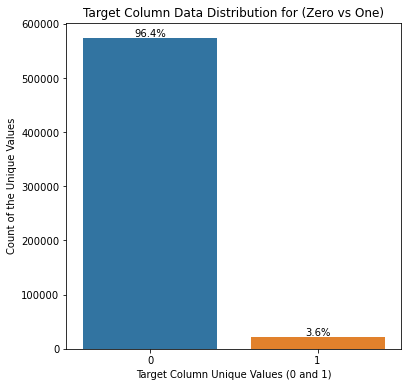

In [15]:
ncount = len(data)

plt.figure(figsize=(6, 6))
ax = sns.countplot(data.target)
sns.set_palette("hls")

plt.title('Target Column Data Distribution for (Zero vs One)')
plt.xlabel('Target Column Unique Values (0 and 1)')
plt.ylabel('Count of the Unique Values')


for p in ax.patches:
    x = p.get_bbox().get_points()[:, 0]
    y = p.get_bbox().get_points()[1, 1]
    ax.annotate('{:.1f}%'.format(100.*y/ncount), (x.mean(), y),
                ha='center', va='bottom') 

## Question 3 - Number of Categorical Features

    Based on the count of the Feature Type, we see that there are 15 Categorical Features in the dataset, including the column 'id'.

## Question 4 - Number of Binary Features

    Based on the count of the Feature Type, we see that there are 18 Binary Features in the dataset, including the column 'target'.

## Question 5 - Interval Variable Inferences

    26 Countinous Features
    10 Interval Features
    Data Type = float64() is Continous Features are Interval Variables

## Question 6 - Ordinal Variable Inferences

    Ordinal Variables are similar to Categorical but in this case there is a clear ordering of the variables
    26 Countinous Features
    16 Ordinal Features
    Data Type = int64() is Continous Features are Ordinal Variables


## Question 7 - Interval Binary Inferences

    Binary variables are discrete
    Binary Variables following either/or pattern, usually designated using 0 and 1
    18 Binary Variables in the dataset including the 'target' variable



# MACHINE LEARNING MODELLING

In [2]:
outcomes = data['target']
features = data.drop('target',axis = 1 )
features = pd.get_dummies(features)

In [3]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(features, outcomes, test_size=0.2, random_state=42)

In [4]:
#LogisticRgression
LogReg = LogisticRegression(solver = 'saga').fit(X_train , y_train)
LogReg.score(X_test,y_test)

C:\Users\user\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


0.9631645707853465

In [ ]:
param_grid = [    
    {'penalty' : ['l1', 'l2'],
    'C' : np.logspace(-4, 4, 20),
    'solver' : ['sag'],
    'max_iter' : [100, 1000,2500, 5000]
    }
]
from sklearn.model_selection import GridSearchCV
clf = GridSearchCV(LogReg , param_grid = param_grid ,cv =3 , verbose = True , n_jobs = -1)
best_clf = clf.fit(X_train , y_train)
best_clf.best_estimator_
print(classification_report(y_test , y_pred))

Fitting 3 folds for each of 160 candidates, totalling 480 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed: 48.2min


In [8]:
#LogisticRegression
from sklearn.metrics import classification_report
y_pred = LogReg.predict(X_test)
print(classification_report(y_test , y_pred))
print('F1 score: ', format(f1_score(y_test, y_pred)))
print ('Accuracy Score:',format(accuracy_score(y_test , y_pred)))

C:\Users\user\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


              precision    recall  f1-score   support

           0       0.96      1.00      0.98    114658
           1       0.00      0.00      0.00      4385

    accuracy                           0.96    119043
   macro avg       0.48      0.50      0.49    119043
weighted avg       0.93      0.96      0.95    119043

F1 score:  0.0
Accuracy Score: 0.9631645707853465


In [6]:
#DecisionTree
from sklearn.tree import DecisionTreeClassifier

model = DecisionTreeClassifier(criterion='gini', random_state=0 , min_samples_leaf = 6, min_samples_split = 3 )
model.fit(X_train, y_train) 
y_train_pred = model.predict(X_train)
y_test_pred = model.predict(X_test)

from sklearn.metrics import accuracy_score
train_accuracy = accuracy_score(y_train, y_train_pred)
test_accuracy = accuracy_score(y_test, y_test_pred)
print('The training accuracy is', train_accuracy)
print('The test accuracy is', test_accuracy)
print('F1 score: ', format(f1_score(y_test, y_pred)))
print(classification_report(y_test , y_pred))

The training accuracy is 0.9674674327812184
The test accuracy is 0.9517737288206782
F1 score:  0.0
              precision    recall  f1-score   support

           0       0.96      1.00      0.98    114658
           1       0.00      0.00      0.00      4385

    accuracy                           0.96    119043
   macro avg       0.48      0.50      0.49    119043
weighted avg       0.93      0.96      0.95    119043



C:\Users\user\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:
#SVM
from sklearn.svm import SVC
svclassifier = SVC(kernel = 'linear')
svclassifier.fit(X_train , y_train)
y_pred = svclassifier.predict(X_test)
print(y_pred)
print(classification_report(y_test , y_pred))

In [7]:
#BaggingClassifier
from sklearn.ensemble import BaggingClassifier
clf = BaggingClassifier(random_state = 0,
                        n_estimators = 500).fit(X_train, y_train)
print('Accuracy score: ', format(accuracy_score(y_test, y_pred)))
print('Precision score: ', format(precision_score(y_test, y_pred)))
print('Recall score: ', format(recall_score(y_test, y_pred)))
print('F1 score: ', format(f1_score(y_test, y_pred)))

Accuracy score:  0.9631645707853465
Precision score:  0.0
Recall score:  0.0
F1 score:  0.0


C:\Users\user\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [8]:
#RandomForest
from sklearn.ensemble import RandomForestClassifier
clf1 = RandomForestClassifier(n_estimators = 20, random_state =0)
clf1.fit(X_train , y_train)
print('Accuracy Score:' , format(accuracy_score(y_test , y_pred)))
print('Precision score: ', format(precision_score(y_test, y_pred)))
print('Recall score: ', format(recall_score(y_test, y_pred)))
print('F1 score: ', format(f1_score(y_test, y_pred)))

Accuracy Score: 0.9631645707853465
Precision score:  0.0
Recall score:  0.0
F1 score:  0.0


C:\Users\user\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [6]:
#Adaboost
from sklearn.ensemble import AdaBoostClassifier
clf2 = AdaBoostClassifier(n_estimators=50, random_state=0)
clf2.fit(X_train , y_train)
print('Accuracy Score:' , format(accuracy_score(y_test , y_pred)))
print('Precision score: ', format(precision_score(y_test, y_pred)))
print('Recall score: ', format(recall_score(y_test, y_pred)))
print('F1 score: ', format(f1_score(y_test, y_pred)))
print(classification_report(y_test , y_pred))

Accuracy Score: 0.9631645707853465
Precision score:  0.0
Recall score:  0.0


C:\Users\user\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


F1 score:  0.0


C:\Users\user\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


              precision    recall  f1-score   support

           0       0.96      1.00      0.98    114658
           1       0.00      0.00      0.00      4385

    accuracy                           0.96    119043
   macro avg       0.48      0.50      0.49    119043
weighted avg       0.93      0.96      0.95    119043

